In [283]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os

### Business Problem



This project focuses on prediction of student's performance based on some factors such as gender , race, level of education and so on

In [284]:
data = pd.read_csv(os.path.join(os.getcwd(), os.listdir(os.getcwd())[-2]))

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [285]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


 ###### some data types are strings type like gender, race, level of education while some data types are integers like math score, reading score and writing score/

In [286]:
data.isna().sum() # check for missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values from this columns

In [287]:
#checking satistical information about the numerical columns

data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


 Average score in maths is 66, 69.16 for reading score and 68 for writing score,  the closest scoore between any two students is just 15 points far. there scores are not that far from each other

### Data Exploration

#### Does level of Education affect the performance of students in maths?

In [288]:
# data.groupby('parental level of education')["math score"].mean().plot(kind = "bar")
# plt.title("Students performance in maths vs Parental level of education");

The higher the parental level of education the chances of student performing well in the maths exam, their parents are educated enough to influence their children's performance

 Does The type of gender affect the performance of the students??

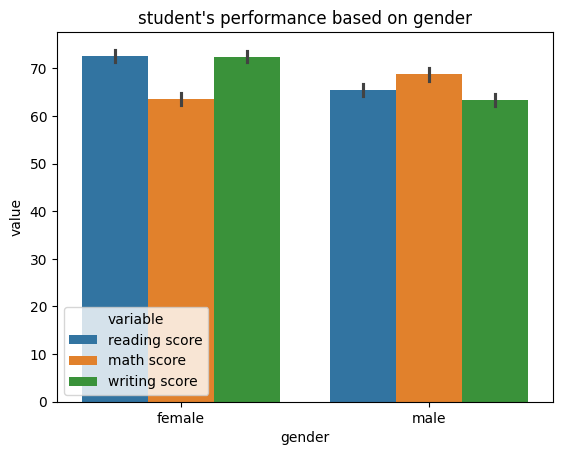

In [289]:
df_melted = pd.melt(data, id_vars='gender', value_vars=['reading score', 'math score', 'writing score'])

sb.barplot(x='gender', y='value', hue='variable', data=df_melted)
plt.title("student's performance based on gender")
plt.show()

Female students outperformed the male students in all subjects except in maths where the male students scored slightly higher than the female students

### How does student performed based on their ethnic groups?

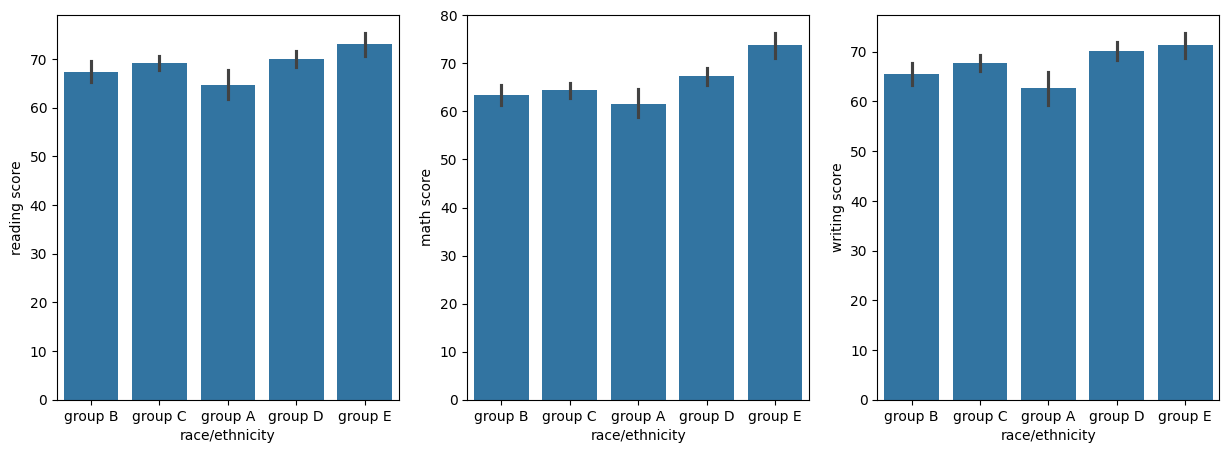

In [290]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sb.barplot(x='race/ethnicity', y='reading score', data=data, ax=axes[0])
sb.barplot(x='race/ethnicity', y='math score', data=data, ax=axes[1])
sb.barplot(x='race/ethnicity', y='writing score', data=data, ax=axes[2])

plt.show()

students from ethnic group were areguably the best across all subjeccts 

Is test preparation a determinant for student performance in the actual exams?

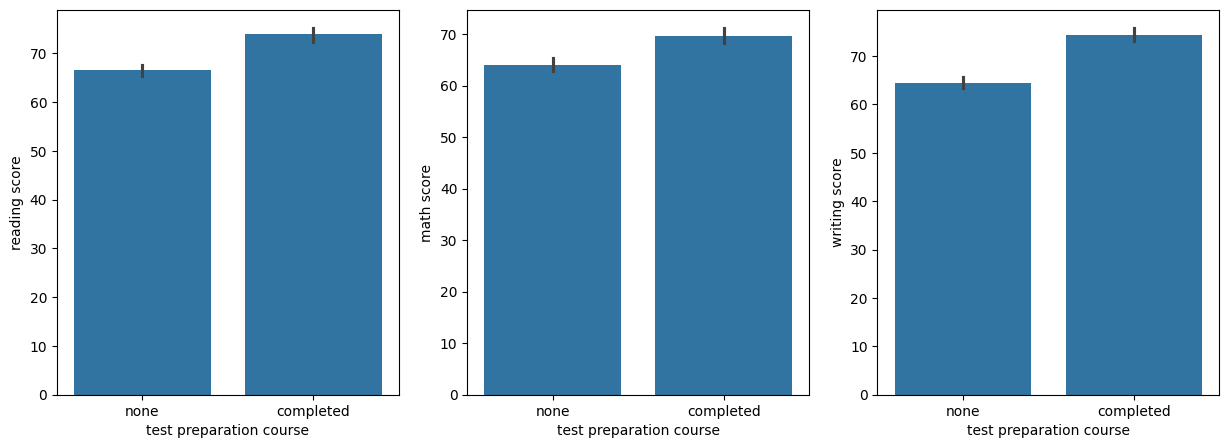

In [291]:


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sb.barplot(x='test preparation course', y='reading score', data=data, ax=axes[0])
sb.barplot(x='test preparation course', y='math score', data=data, ax=axes[1])
sb.barplot(x='test preparation course', y='writing score', data=data, ax=axes[2])

plt.show()

students who have completed their test score performed better in all subjects than others.

In [292]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

<Axes: xlabel='lunch', ylabel='writing score'>

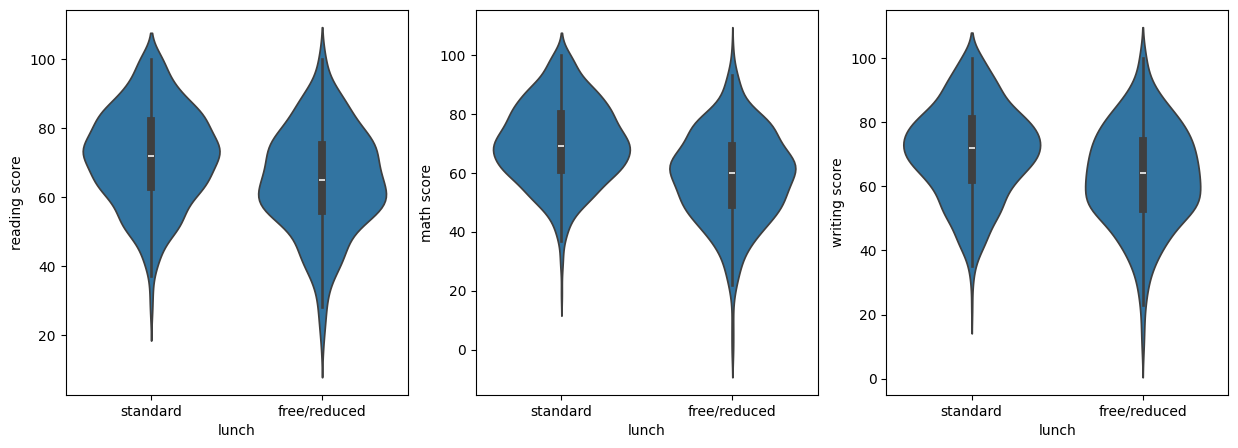

In [293]:


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sb.violinplot(x='lunch', y='reading score', data=data, ax=axes[0])
sb.violinplot(x='lunch', y='math score', data=data, ax=axes[1])
sb.violinplot(x='lunch', y='writing score', data=data, ax=axes[2])


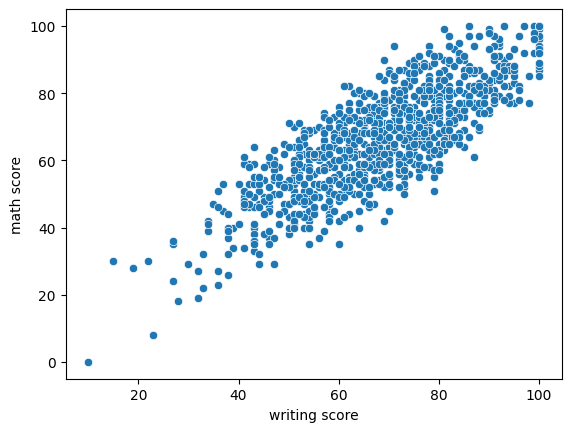

In [294]:
sb.scatterplot(x = data['writing score'], y = data['math score']);

students who likely perform well has astronger chance of performing well in maths too

Students who received standard lunch perform better than the ones whose lunch were reduced

In [295]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

# Final observations

1. Average scores in all subject is between 66 and 69
2. Female students outperformed male students in all subject excep in math.
3. The more higher level of education , the chances of getting higher scores  in all subjects
4. students who have completed their test score have higher chances of scoring well
5. Ethic group D performed well in subjects, we cant really say ethnic group is a key factor in assessing the performance of student
6. the categorical columns would most be transformed using one-hot-encoded while only level of education would be transformed using ordinal-encoder

### Also good to share some mathematical background


its also good to visualize how the function works in linear space, here I have demonstrated this below

Y = M * x + E   will be transformed into 


math score)  = B* Gender + B * Ethnic + B * lunch + B * test completed + B*level of education + B * Reading scores + B * Writing score + E


where Y = math score - dependent variable


B = M and E are parameter - M measures the coeficient of independent variables while E measure the cost function or Error


Independent variables are Gender, Ethnic grp, Lunch, test completed and level of Education, Reading score, writing score





In [296]:
# data['Average_score'] = ((data['reading score'] + data["writing score"] + data['math score'])/300) * 100

# data_copy = data.copy()


# The Architecture of this problem 

1. Data Exploration
2. Feature engineering / Data transformation
3. Data splitting
4. Model training 
5. Fine tuning
6. choose the best model and test

In [297]:
# data.drop(['reading score','math score', 'writing score'], axis = 1, inplace = True)

In [254]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [255]:
#### Data transformation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [256]:
# parental_level_education = [["some high school", "high school", "some college","associate's degree","bachelor's degree","master's degree"]]
# Encoder = OrdinalEncoder(categories=parental_level_education)

# data["transformed_parental_education"] = Encoder.fit_transform(data[['parental level of education']])

# data.drop('parental level of education', axis = 1 , inplace = True)

In [298]:
### One Hot Encoding
categorical_columns = ["gender","test preparation course",'race/ethnicity', 'lunch', "parental level of education"]

One_Hot = OneHotEncoder(sparse_output= True, handle_unknown= 'ignore')

sparse_matrix = One_Hot.fit_transform(data[categorical_columns])


In [299]:
dense_matrix = sparse_matrix.toarray()
feature_names = One_Hot.get_feature_names_out(categorical_columns)



encoded_df = pd.DataFrame(dense_matrix, columns = feature_names)

data = pd.concat([data.drop(categorical_columns, axis = 1), encoded_df], axis = 1)

In [300]:
data

,math score,reading score,writing score,gender_female,gender_male,test preparation course_completed,test preparation course_none,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,72,72,74,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,69,90,88,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,90,95,93,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,47,57,44,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,76,78,75,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
996,62,55,55,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
997,59,71,65,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
998,68,78,77,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Data Splitting

In [301]:
Y = data["math score"]
X = data.drop("math score", axis = 1)

In [302]:
X.columns

Index(['reading score', 'writing score', 'gender_female', 'gender_male',
       'test preparation course_completed', 'test preparation course_none',
       'race/ethnicity_group A', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E', 'lunch_free/reduced', 'lunch_standard',
       'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school'],
      dtype='object')

In [303]:
scaler = StandardScaler()

X[["reading score_transformed", "Writing score_transformed"]] = scaler.fit_transform(X[['reading score', "writing score"]])
X.drop(['reading score', "writing score"], axis = 1)

,gender_female,gender_male,test preparation course_completed,test preparation course_none,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,reading score_transformed,Writing score_transformed
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.193999,0.391492
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.427476,1.313269
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.770109,1.642475
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.833899,-1.583744
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.605158,0.457333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.044215,1.774157
996,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.970952,-0.859491
997,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.125472,-0.201079
998,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.605158,0.589015


In [304]:
X

,reading score,writing score,gender_female,gender_male,test preparation course_completed,test preparation course_none,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,...,lunch_free/reduced,lunch_standard,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,reading score_transformed,Writing score_transformed
0,72,74,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.193999,0.391492
1,90,88,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.427476,1.313269
2,95,93,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.770109,1.642475
3,57,44,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.833899,-1.583744
4,78,75,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.605158,0.457333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,99,95,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.044215,1.774157
996,55,55,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.970952,-0.859491
997,71,65,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.125472,-0.201079
998,78,77,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.605158,0.589015


### Data splitting

In [305]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= .2 , random_state= 5)





### Model training

In [306]:
# lets import base model

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error,mean_squared_error,accuracy_score

In [307]:
linear_model = LinearRegression()

linear_model.fit(X_train, Y_train)

Y_predict = linear_model.predict(X_test)

np.mean((Y_predict, Y_test)*2)



np.float64(66.50383508270357)

In [309]:
r2_score(Y_predict, Y_test)

0.8581459246245002

In [274]:
alphas = [0.00000000001, .0001,.001, .01, 1, 10, 100, 1000]

for alpha in alphas:
    Ridge_model = Ridge(alpha)
    Ridge_model.fit(X_train, Y_train)
    Ridge_predict = Ridge_model.predict(X_test)
    r2_score_ = r2_score(Ridge_predict, Y_test)
    print(alpha)
    print(r2_score_, end= "\n")




1e-11
0.858081969034076
0.0001
0.858081950098186
0.001
0.8580817796735978
0.01
0.8580800752731
1
0.8578908903347846
10
0.8560290314594814
100
0.8300354347772989
1000
0.6401228678678005


c:\Users\Rotim\OneDrive\Documents\Data_Science_Projects\Student_ML_Project\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.00802e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [280]:
alphas = [0.00000000001, .0001,.001, .01, 1, 10, 100, 1000]
for alpha in alphas:
    Lasso_model = Lasso(alpha)
    Lasso_model.fit(X_train, Y_train)
    Lasso_predict = Lasso_model.predict(X_test)
    r2_score_ = r2_score(Lasso_predict, Y_test)
    print(alpha)
    print(r2_score_, end= "\n")

1e-11
0.8580819690332191
0.0001
0.8580733745553716
0.001
0.8579975885581397
0.01
0.8578102898259966
1
0.7491929567087174
10
0.4063541360832227
100
-3.2503796980169266
1000
-1.188282434432647e+30


c:\Users\Rotim\OneDrive\Documents\Data_Science_Projects\Student_ML_Project\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.820e+03, tolerance: 1.817e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Rotim\OneDrive\Documents\Data_Science_Projects\Student_ML_Project\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.824e+03, tolerance: 1.817e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Rotim\OneDrive\Documents\Data_Science_Projects\Student_ML_Project\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not c

In [279]:
Rf_model = RandomForestRegressor()

Rf_model.fit(X_train, Y_train)

rf_predict = Rf_model.predict(X_test)

r2_score(rf_predict, Y_test)

0.7999499063751998

In [229]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X_train)



r_f_model.fit(X_scaler, Y_train)

Y_predict_3 = r_f_model.predict((X_test))

print(r2_score(Y_predict_3, Y_test))

-9.266586965041325


c:\Users\Rotim\OneDrive\Documents\Data_Science_Projects\Student_ML_Project\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
